In [31]:
import  random
import re 
import seaborn as sns
import pandas as pd

In [11]:
def generate_rand(len,start,end):
    ls = []
    for i in range(len):
        ls.append(random.randint(start,end))
    return ls

def first_digit(num):
    match = re.search(r'\d', str(num))
    digit = int(match.group())
    return -digit if (num < 0) else digit

In [22]:
def verify_benford(arr):
    fls = []
    l = len(arr)
    for i in arr:
        fls.append(first_digit(i))
    return fls

<Axes: xlabel='digit', ylabel='count'>

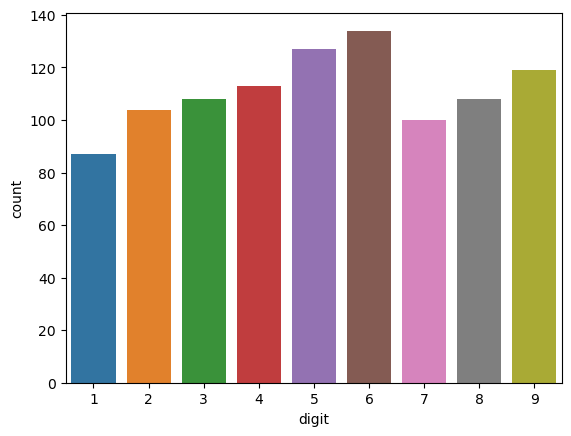

In [43]:
l=generate_rand(1000,1,9999999)
x = verify_benford(l)
df = pd.DataFrame(x,columns=['digit'],dtype=int,index=None)
df = df.astype({'digit': 'int64'})
df = df.reindex(columns=['digit'])
df = df.groupby('digit').size().reset_index(name='count')
sns.barplot(x='digit',y='count',data=df)

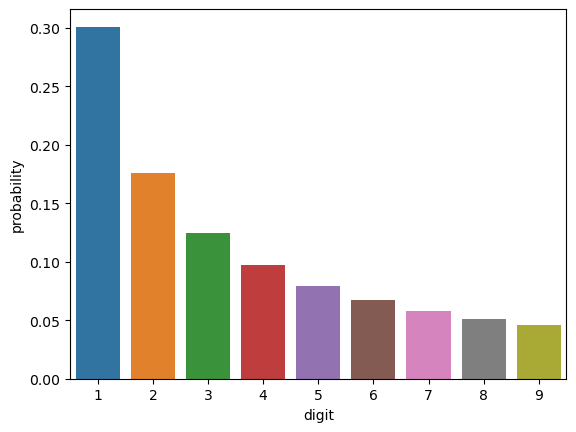

In [45]:
## plot the probability of the first digit of a number
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# plot the probability of the first digit of a number
def plot_benford():
    df = pd.DataFrame({'digit': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                       'probability': [0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046]})
    sns.barplot(x='digit', y='probability', data=df)
    plt.show()

plot_benford()

In [49]:
def add_benford_pdf(df):
    df['benford_pdf'] = df['digit'].apply(lambda x: 0.301 if x == 1 else 0.176 if x == 2 else 0.125 if x == 3 else 0.097 if x == 4 else 0.079 if x == 5 else 0.067 if x == 6 else 0.058 if x == 7 else 0.051 if x == 8 else 0.046 if x == 9 else 0)
    df['obtained_pdf'] = df['count'] / df['count'].sum()
    df['difference'] = df['obtained_pdf'] - df['benford_pdf']
    return df
df = add_benford_pdf(df)
df


,digit,count,pdf,benford_pdf,obtained_pdf,difference
0,1,87,0.301,0.301,0.087,-0.214
1,2,104,0.176,0.176,0.104,-0.072
2,3,108,0.125,0.125,0.108,-0.017
3,4,113,0.097,0.097,0.113,0.016
4,5,127,0.079,0.079,0.127,0.048
5,6,134,0.067,0.067,0.134,0.067
6,7,100,0.058,0.058,0.100,0.042
7,8,108,0.051,0.051,0.108,0.057
8,9,119,0.046,0.046,0.119,0.073
